In [2]:
import psycopg2 as pg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import re
import networkx as nx
from collections import Counter
from __future__ import division
import community
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Connect to psql database
conn = pg2.connect(dbname='lastfm', user='evansadler', host='/tmp')
c = conn.cursor()

In [4]:
query = 'select * from pairs;'
df = pd.read_sql_query(query, conn)


In [49]:
df.max()

count         232
artist1    zero 7
artist2    zero 7
dtype: object

In [50]:
df['count'] = 333 - df['count']

In [51]:
subset = df[['artist1', 'artist2','count']]
tuples = [tuple(x) for x in subset.values]

In [52]:
G=nx.Graph()

In [53]:
G.add_weighted_edges_from(tuples)

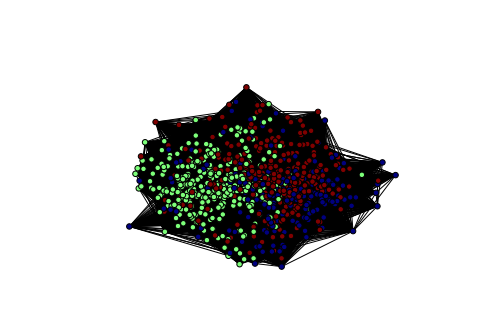

In [67]:
part = community.best_partition(G)
values = [part.get(node) for node in G.nodes()]

nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
plt.show()

In [54]:
dc = nx.degree_centrality(G)

In [55]:
df_dc = pd.DataFrame(dc.values(), index = dc.keys())

In [56]:
df_dc.sort(0, ascending = False).head()

,0
the beatles,0.991021
radiohead,0.975309
death cab for cutie,0.968575
coldplay,0.964085
modest mouse,0.945006


In [57]:
bc = nx.betweenness_centrality(G, weight = 'weight')
df_bc = pd.DataFrame(bc.values(), index = bc.keys())

In [82]:
df_bc.sort(0, ascending=False).head()

,0
the beatles,0.244550
radiohead,0.105426
death cab for cutie,0.049720
coldplay,0.024069
kanye west,0.020565


In [83]:
ec = nx.eigenvector_centrality(G, weight = 'weight')
df_ec = pd.DataFrame(ec.values(), index = ec.keys())

In [90]:
df_ec.sort(0, ascending=False).head()

,0
coldplay,0.056472
death cab for cutie,0.056174
modest mouse,0.055968
red hot chili peppers,0.055651
radiohead,0.055516


In [91]:
bmc = [x[0] for x in Counter(bc).most_common(50)]
dmc = [x[0] for x in Counter(dc).most_common(50)]
emc = [x[0] for x in Counter(ec).most_common(50)]

In [92]:
def difference(c1,c2):
    union = list(set(c1) & set(c2))
    intersect = list(set(c1) | set(c2))
    return len(union) / len(intersect)

In [94]:
difference(emc, dmc)

0.9607843137254902

In [105]:
list(set(bmc) - set(emc))

['of montreal',
 'paramore',
 'britney spears',
 'linkin park',
 'lady gaga',
 'madonna',
 'iron maiden',
 'the roots',
 'rihanna',
 'miles davis',
 'blink-182',
 'animal collective',
 'brand new',
 'outkast',
 'tool',
 'system of a down',
 'eminem',
 'taking back sunday',
 'metallica',
 'fall out boy',
 'the clash',
 'air',
 'a tribe called quest',
 'jay-z']

In [73]:
df_bc.ix[df_bc.index.str.contains("daft"),:]

,0
daft punk,0.003018


Index([u'otis redding', u'katy perry', u'matt & kim',
       u'the american analog set', u'the flaming lips', u'mitch hedberg',
       u'maroon 5', u'hoobastank', u'rise against', u'taylor swift', 
       ...
       u'johann sebastian bach', u'jewel', u'emery', u'john mayer', u'doves',
       u'alan jackson', u'john coltrane', u'keane', u'caribou',
       u'the gaslight anthem'],
      dtype='object', length=892)